# Julia 數值系統介紹

Julia 數值系統型別 (Type) 階層，其最上層的父型別是 `Any`，也是 Julia 所有型別的父型別。數值系統的最上層父型別為 `Number`。

![](Julia_Number.png)

## 1. 整數 (Integer)

整數是數值系統中最基本的型別，分為有正負號 (signed) 與無正負號 (unsigned) 整數型別，其最大和最小值也不同。

|是否有正負號|型別|<div style="width:120px">最大值</div>|<div style="width:120px">最小值</div>|
|---|---|---|---|
|有|Int128, Int64, Int32, Int16, Int8|$2^{位元數-1}-1$|$-2^{位元數-1}$|
|無|UInt128, UInt64, UInt32, UInt16, UInt8|$2^{位元數}-1$|$0$|


### 1.1 範圍

下面範例是呼叫 `typemax()` 與 `typemin()` 函式查看 Int64 型別的最大值和最小值。

In [1]:
println("$(rpad(Int64,7)): 最小值 $(typemin(Int64)), 最大值 $(typemax(Int64))")

Int64  : 最小值 -9223372036854775808, 最大值 9223372036854775807


`BigInt` 型別是任意精度 (Arbitrary Precision)，若要呼叫 `typemax()` 或 `typemin()` 則會產生錯誤。

In [2]:
typemax(BigInt)

MethodError: MethodError: no method matching typemax(::Type{BigInt})
Closest candidates are:
  typemax(!Matched::Type{Bool}) at bool.jl:7
  typemax(!Matched::Type{Int8}) at int.jl:666
  typemax(!Matched::Type{UInt8}) at int.jl:668
  ...

In [3]:
typemin(BigInt)

MethodError: MethodError: no method matching typemin(::Type{BigInt})
Closest candidates are:
  typemin(!Matched::Type{Bool}) at bool.jl:6
  typemin(!Matched::Type{Int8}) at int.jl:665
  typemin(!Matched::Type{UInt8}) at int.jl:667
  ...

### 1.2 使用與宣告變數

Julia 會自動判斷適用的整數值型別，十進位的值會自動指定為有正負號的整數，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Int64` 型別。(註: 在不影響位元數的情況下，也就是未超過型別的最大值，且未指定型別。)

若超過 `Int64` 最大值時，Julia 會自動判斷並將型別定為 `Int128`。

In [2]:
# 查看內部變數 Sys.WORD_SIZE，顯示作業系統為 32-bit 或 64-bit。
Sys.WORD_SIZE

64

In [3]:
x = 3
typeof(x)

Int64

使用 `length()` 加上 `bitstring()` 函式可以看到不同整數型別的位元數。

In [4]:
length(bitstring(x))

64

In [5]:
println("Int64 的位元組數是: ", sizeof(x))

Int64 的位元組數是: 8


若是十六進位、八進位、二進位的整數值，則可以將 `0x`, `0o`, `0b` 放在數值之前，代表不同的進位制。下面的例子是十進位制的 20 在不同進位制的宣告。

須留意十六進位、八進位、二進位之英文字母均需小寫。

In [6]:
# 十進位
20

20

In [7]:
# 十六進位
0x14

0x14

In [8]:
# 八進位
0o24

0x14

上面有提到，十進位的整數會自動判斷為有 signed 整數，但是十六/八/二進位則會自動判斷為 unsigned。

In [9]:
typeof(0x14)

UInt8

### 1.3 指定型別與轉換

型別的指定，只要在宣告時加上型別名稱即可。以下例來說，如果沒有指定的話，型別會是 `Int64`。

In [10]:
y = Int128(3)
typeof(y)

Int128

In [11]:
length(bitstring(y))

128

#### `signed()` 或 `unsigned()`

有無正負號的轉換，可以透過 `signed()` 或 `unsigned()` 來進行。下面的例子就可以看到我們把 `Int64` 轉換為 `UInt64` 型別。

In [14]:
typeof(unsigned(20))

UInt64

將 `UInt32` 轉為 `Int32`。

In [15]:
typeof(signed(UInt32(20)))

Int32

要留意的是，`signed()` 轉換時，若造成轉換後溢位 (overflow)，系統並不會顯示錯誤。

In [15]:
x = typemax(UInt8) # UInt8 最大值為 255
signed(x) # 由於 Int8 的最大值為 127，所以轉換後會造成 overflow

0xff

#### `BigInt`

`BigInt` 可以用在當型別要超出精度時 (例如最大值加 1 或是最小值 - 1)，避免因此而造成溢位 (overflow)。

In [17]:
# 溢位，結果為負數
typemax(Int64) + 1

-9223372036854775808

`BigInt` 必須明確 (explicitly) 宣告，無法自動被 promote。轉換為 `BigInt` 後就不會造成溢位了。

In [18]:
BigInt(typemax(Int64)) + 1

9223372036854775808

### 1.4 Division Error

相除取整數 (integer divide; 運算子為 $\div$) 時，若是將整數 $\div$ 零，會產生 `DivideError`。

有關於運算及運算子，會在未來的內容中進行詳細介紹。

In [19]:
3 ÷ 0

DivideError: DivideError: integer division error

但是除法 (divide) 的分母可以為 0，其結果為無窮大。

In [20]:
3 / 0

Inf

## 2. 布林值 (Bool)

布林值是用 `true` 或 `false` 保留字來代表邏輯判斷的"真"或"假"。

在型別系統上，`Bool` 是 `Integer` 的子型別。如果用 `bitstring()` 來查看的話，會發現 `true` / `false` 內部是以 `Int8` 型別表達。

In [21]:
bitstring(true), bitstring(false)

("00000001", "00000000")

### 轉換

`Bool` 可以與整數型別進行互相轉換。

In [22]:
# Bool 轉為整數，只要是整數型別都可以
Int(true), Int8(false)

(1, 0)

In [23]:
# 整數轉為 Bool
Bool(Int64(1)), Bool(0)

(true, false)

若嘗試將非 1 / 0 的整數值轉為 `Bool`，則會產生 `InexactError` 錯誤。

In [24]:
Bool(10)

InexactError: InexactError: Bool(10)

跟有些程式語言不同的是，在 Julia 中不能用 1 / 0 整數值來取代 `true` / `false`，會造成 `TypeError` 錯誤。

In [25]:
while 1
    println("true")
end

TypeError: TypeError: non-boolean (Int64) used in boolean context

## 3. 浮點數 (Floating Point)

浮點數沒有 signed / unsigned 的區分，而是分為不同的精度。

|型別|精度|
|---|---|
|`Float16`|半精度(Half Precision)|
|`Float32`|單精度(Single Precision)|
|`Float64`|雙精度(Double Precision)|

### 3.1 範圍

浮點數是實數的子型別，其邊界值為無窮大或負無窮大。

|型別|最小值|最大值|
|---|---|---|
|`Float64`|-Inf|Inf|
|`Float32`|-Inf 或 -Inf32|Inf 或 Inf32|
|`Float16`|-Inf 或 -Inf16|Inf 或 Inf16|

無窮值 (`Inf` 及 `-Inf`) 在 Julia 都是正常的浮點數。下面範例是呼叫 `typemax()` 與 `typemin()` 函式可以查看 Float64 型別的最大值和最小值。

In [95]:
println("$(rpad(Float64,7)): 最小值 $(typemin(Float64)), 最大值 $(typemax(Float64))")

Float64: 最小值 -Inf, 最大值 Inf


In [27]:
typemax(Float16)

Inf16

### 3.2 宣告

下列的方式均可宣告數值為浮點數。

In [28]:
1.0, 1., 0.5, .5, -1.2

(1.0, 1.0, 0.5, 0.5, -1.2)

用科學記號的表示方式也可以。

In [29]:
1.e10, 1.0e-3

(1.0e10, 0.001)

同樣的，預設的位數是以作業系統位元數為準，例如 64 位元的作業系統就會自動採用 `Float64` 型別。

In [30]:
typeof(1.)

Float64

若加上 f0 字串，則是宣告為 `Float32`。

In [31]:
1f0

1.0f0

In [32]:
# ans 是 Julia 將最後一個值指定給 ans 變數
typeof(ans)

Float32

除了上述 `Inf` 是浮點數外，`NaN` (not a number) 也是屬於特殊浮點數，有 `NaN`, `NaN64`, `NaN32`, `NaN16` 。

In [33]:
typeof(NaN)

Float64

浮點數零比較特別，正零與負零均為零，請看下面範例。但是實際上正零與負零的位元內容不相同。

In [34]:
0.0 == -0.0

true

In [35]:
bitstring(0.0)

"0000000000000000000000000000000000000000000000000000000000000000"

In [36]:
bitstring(-0.0)

"1000000000000000000000000000000000000000000000000000000000000000"

如果要避免混淆，可以透過 `zero()` 函式來宣告零浮點數。

`zero()` 函式的用途很廣泛，未來會在相關應用時提供範例。

In [37]:
zero(Float64)

0.0

In [38]:
bitstring(ans)

"0000000000000000000000000000000000000000000000000000000000000000"

### 3.3 指定型別

型別的指定，只要在宣告時加上型別名稱即可。

In [39]:
Float32(1.0)

1.0f0

In [40]:
typeof(ans)

Float32

### 3.4 $\epsilon$ (epsilon)

Julia 提供了 `eps()` 函式來計算 epsilon。

In [41]:
eps()

2.220446049250313e-16

In [42]:
# 預設即為 eps(Float64)
eps(Float64)

2.220446049250313e-16

也可以計算某特定數值的 epsilon。

In [43]:
eps(100.0)

1.4210854715202004e-14

100.0 的下一個可表現的浮點值如下例。

In [44]:
100.0 + eps(100.0)

100.00000000000001

同樣的，我們也可以用 `nextfloat()` 或 `prevfloat()` 來取得下一個或上一個可表現的浮點數值。

In [45]:
nextfloat(100.0)

100.00000000000001

### 3.5  Rounding

在 Rounding 的方法部分，Julia 是採用 IEEE 754 規範，也就是 `RoundNearest`，取最近的偶數(四捨五取最近偶數)，而非我們一般講的四捨五入。

要採用不同的 rounding 方法，可在呼叫 `round()` 函式時加入不同的常數參數，列表如下:

|常數|描述|
|---|---|
|RoundNearest (default)|四捨五取最近偶數(預設)|
|RoundNearestTiesAway|四捨五取遠離0|
|RoundNearestTiesUp|四捨五入|
|RoundToZero|無條件捨去|
|RoundFromZero (BigFloat only)|四捨五取遠離0|
|RoundUp|無條件進位|
|RoundDown|無條件退位|

In [46]:
round(1.2)

1.0

In [47]:
# 最近的偶數為 0
round(0.5)

0.0

In [48]:
# 最近的偶數為 2
round(1.5), round(2.5)

(2.0, 2.0)

In [49]:
# 若要四捨五入, 加上 RoundNearestTiesUp 常數參數
round(2.4, RoundNearestTiesUp), round(1.6, RoundNearestTiesUp)

(2.0, 2.0)

In [50]:
round(-1.5, RoundDown), round(1.5, RoundDown)

(-2.0, 1.0)

## 4. 有理數 (Rational)

### 4.1 宣告

有理數是用 "分子//分母" 的格式宣告，有規則如下：
- 分子、分母均需為整數
- 分子、分母的整數型別不同時，會自動進行必要的轉換
- 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
- 分子及分母不可為浮點數
- 分母或分子可為零，但是不可分子和分母同時為零

In [51]:
# 分子、分母均需為整數
1//2

1//2

In [52]:
# 分子、分母的整數型別不同時，會自動進行必要的轉換
UInt32(3)//Int8(5)

0x00000003//0x00000005

In [53]:
typeof(ans)

Rational{UInt32}

In [54]:
# 分子、分母可為正或負數，但是有理數會被約分為分母不為負數的形式
2//-1

-2//1

In [55]:
# 約分
3 // 6

1//2

In [56]:
# 分子及分母不可為浮點數
1.1//2

MethodError: MethodError: no method matching //(::Float64, ::Int64)
Closest candidates are:
  //(!Matched::Integer, ::Integer) at rational.jl:43
  //(!Matched::Rational, ::Integer) at rational.jl:46
  //(!Matched::Complex, ::Real) at rational.jl:59
  ...

In [57]:
# 分母或分子可為零
0//5

0//1

In [58]:
# 分母或分子可為零，但是不可分子和分母同時為零
0//0

ArgumentError: ArgumentError: invalid rational: zero(Int64)//zero(Int64)

### 4.2 轉換

有理數與浮點數之間可以進行轉換。

In [59]:
# 有理數轉為浮點數
Float64(3//2)

1.5

In [60]:
# 浮點數轉為有理數
Rational(-0.25)

-1//4

### 4.3 `numerator()` 與 `denominator()` 

呼叫 `numerator()` 與 `denominator()` 函式分別可以取得有理數的分子或分母值。

In [61]:
r = 2//3

# 取得有理數的分子
numerator(r)

2

In [62]:
# 取得有理數的分母
denominator(r)

3

## 5. 複數 (Complex)

### 5.1 宣告

複數是由實部和虛部組成，格式為 "實部+虛部im"。實部和虛部可以是任何實數 (Real) 型別，包含整數、浮點數、有理數、無理數。

In [63]:
1 + 2im

1 + 2im

若未提供實部或虛部值，則預設為 0。

In [64]:
Complex(1)

1 + 0im

In [65]:
Complex(2im)

0 + 2im

若是使用變數來組成複數的實部和虛部，則在虛部的部分需要加上 `*`。

In [66]:
a = 1; b = 2

a + b * im

1 + 2im

但由於使用 `*` 的方式易與乘法混淆，為避免也可以使用 `complex()` 函式，或是指定型別來組成。

In [67]:
complex(a, b)

1 + 2im

In [68]:
# 型別由 Julia 自動確定
typeof(ans)

Complex{Int64}

In [69]:
Complex(a, b)

1 + 2im

實部及虛部為浮點數時，而且要指定型別時，可以使用下列方式宣告。

|複數型別|別名|
|---|---|
|Complex{Float64}|ComplexF64|
|Complex{Float32}|ComplexF32|
|Complex{Float16}|ComplexF16|

In [70]:
Complex{Float64}(1, 2)

1.0 + 2.0im

In [71]:
# 使用別名
ComplexF32(1, 2)

1.0f0 + 2.0f0im

In [72]:
# 整數也可以
typeof(Complex{Int64}(1, 2))

Complex{Int64}

### 5.2 複數常用函式

|函式|說明|
|---|---|
|`real()`|取得實部|
|`imag()`|取得虛部|
|`reim()`|同時取得實部與虚部|
|`conj()`|共軛|
|`abs()`|絕對值，與0的距離|
|`abs2()`|絕對值平方|
|`angle()`|相角|

In [73]:
x = Complex{Float64}(1, 2)

1.0 + 2.0im

In [74]:
real(x)

1.0

In [75]:
imag(x)

2.0

In [76]:
reim(x)

(1.0, 2.0)

In [77]:
conj(x)

1.0 - 2.0im

In [78]:
abs(x)

2.23606797749979

In [79]:
abs2(x)

5.0

In [80]:
angle(x)

1.1071487177940904

## 6. 無理數 (Irrational)

無限不循環小數，例如 $\pi$ 即為無理數。以下用 Julia 內建常數 $\pi$ 與 ℯ 來做示範。

In [81]:
# π 為內建的數學常數，將在未來的內容介紹。
pi

π = 3.1415926535897...

In [82]:
typeof(pi)

Irrational{:π}

In [83]:
# 歐拉數 (Euler's number)，為內建的數學常數，將在未來的內容介紹。
typeof(ℯ)

Irrational{:ℯ}

## 7. 隨機數

|函式|描述|
|--|--|
|rand()|產生元素為隨機介於 \[0, 1) 區間的均勻分布數字|
|randn()|產生元素為隨機常態分布的數字|
|randexp()|產生元素為隨機指數分布的數字|

隨機產生 1000 個數字，簡單地用 Plots 套件觀察其分布。有關於圖表的部分，會在後續內容中進行詳細介紹。

隨機數字的型別預設是 `Float64`。

In [17]:
# 若未曾安裝 Plots 套件, 請先安裝
using Pkg
Pkg.add("Plots")

   Updating registry at `C:\Users\sheephy\.julia\registries\General`
┌ Warning: Some registries failed to update:
│     — `C:\Users\sheephy\.julia\registries\General` — registry dirty
└ @ Pkg.Types D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\Types.jl:1122
  Resolving package versions...
  Installed Measures ─────── v0.3.1
  Installed RecipesBase ──── v0.8.0
  Installed FFMPEG ───────── v0.3.0
  Installed Bzip2_jll ────── v1.0.6+1
  Installed OpenSSL_jll ──── v1.1.1+1
  Installed x264_jll ─────── v2019.5.25+1
  Installed PlotUtils ────── v0.6.3
  Installed Plots ────────── v0.29.4
  Installed FriBidi_jll ──── v1.0.5+2
  Installed FFMPEG_jll ───── v4.1.0+2
  Installed Ogg_jll ──────── v1.3.3+0
  Installed x265_jll ─────── v3.0.0+0
  Installed PlotThemes ───── v1.0.1
  Installed libass_jll ───── v0.14.0+0
  Installed StatsBase ────── v0.32.1
  Installed LAME_jll ─────── v3.100.0+0
  Installed Zlib_jll ─────── v1.2.11+8
  Installed libfdk_aac_jll ─ v0.1.6+1
 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


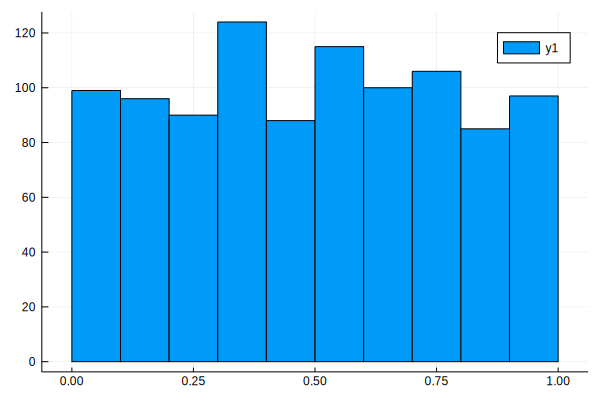

In [18]:
using Plots

histogram(rand(1000))

下面範例是加入 range 定義，產生 10 個 1 到 100 之間的隨機數字。

In [19]:
rand(1:100, 10)

10-element Array{Int64,1}:
 68
 78
 42
  7
 83
 27
 46
 32
 88
 62

產生隨機常態分布數字。

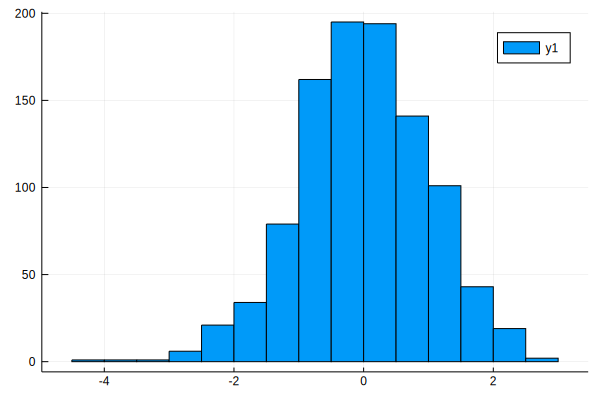

In [20]:
histogram(randn(1000))

產生隨機指數分布數字。`randexp()` 預設的數值型別也是 `Float64`。

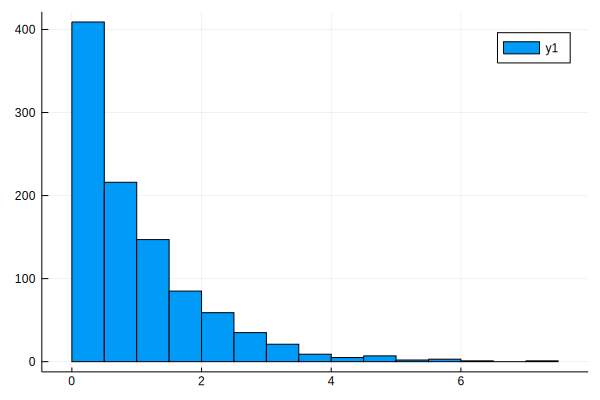

In [21]:
using Random

histogram(randexp(1000))